In [34]:
import pandas as pd 
import  numpy as np
import matplotlib.pyplot as plt

In [35]:
df=pd.read_csv('/Users/ok/Downloads/data_gab_synthetique22.csv')
df.columns
df.dtypes

id                  int64
id_gab              int64
année               int64
mois                int64
day                 int64
heure               int64
minutes             int64
latitude          float64
longtitude        float64
region             object
montant             int64
num_operations      int64
dtype: object

In [36]:
df.groupby(['mois','id_gab']).count()


id  année  day  heure  minutes  latitude  longtitude  region  \
mois id_gab                                                                  
1    2       126    126  126    126      126       126         126     126   
     3       116    116  116    116      116       116         116     116   
     4        39     39   39     39       39        39          39      39   
     5        23     23   23     23       23        23          23      23   
     6       182    182  182    182      182       182         182     182   
...          ...    ...  ...    ...      ...       ...         ...     ...   
7    6       135    135  135    135      135       135         135     135   
     7       108    108  108    108      108       108         108     108   
     11      159    159  159    159      159       159         159     159   
     22       54     54   54     54       54        54          54      54   
     75       78     78   78     78       78        78          78      78   

             montant  num_operations  
mois id_gab                           
1    2           126             126  
     3           116             116  
     4            39              39  
     5            23              23  
     6           182             182  
...              ...             ...  
7    6           135             135  
     7           108             108  
     11          159             159  
     22           54              54  
     75           78              78  

[78 rows x 10 columns]

### Création d'une variable de plage horaires pour les transactions 10h-19h (Heure ouverture magasins) 

In [37]:

sec_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:1,11:1,12:1,13:1,14:1,15:1,
          16:1,16:1,17:1,18:1,19:1,20:0,21:0,22:0,23:0 }

df['horaire_ouverture_mag'] = df['heure'].map(sec_dict)
df    

,id,id_gab,année,mois,day,heure,minutes,latitude,longtitude,region,montant,num_operations,horaire_ouverture_mag
0,1,2,2017,1,1,0,13,33.008578,-2.895681,region_1,2600,226577647,0
1,2,2,2017,1,1,0,55,33.008578,-2.895681,region_1,1500,390556329,0
2,3,3,2017,1,1,0,16,32.175527,-7.758277,region_2,1900,580524124,0
3,4,4,2017,1,1,0,34,28.632658,-9.281029,region_3,4600,206092081,0
4,5,5,2017,1,1,0,19,33.486351,-7.662244,region_4,900,223378241,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17534,1249956,7,2017,7,2,12,29,31.655957,-7.967692,region_6,4500,617322512,1
17535,1249957,11,2017,7,2,12,46,33.008578,-2.095681,region_1,1700,512178952,1
17536,1249966,11,2017,7,2,12,41,33.008578,-2.095681,region_1,2300,525435906,1
17537,1249997,2,2017,7,2,12,42,33.008578,-2.895681,region_1,4600,112215145,1


### Bucket Montants retrait 100-200/ 200-500/ 500-1000/1000-2000/2000-3500/3500-5000


In [98]:
''' binning or bucketing with labels'''
 
bins = [100,200, 500, 1000, 2000,3500,5000]
labels =[1,2,3,4,5,6]
df['retrait-categorie'] = pd.cut(df['montant'], bins,labels=labels)
print (df)

            id  id_gab  année  mois  day  heure  minutes   latitude  \
0            1       2   2017     1    1      0       13  33.008578   
1            2       2   2017     1    1      0       55  33.008578   
2            3       3   2017     1    1      0       16  32.175527   
3            4       4   2017     1    1      0       34  28.632658   
4            5       5   2017     1    1      0       19  33.486351   
...        ...     ...    ...   ...  ...    ...      ...        ...   
17534  1249956       7   2017     7    2     12       29  31.655957   
17535  1249957      11   2017     7    2     12       46  33.008578   
17536  1249966      11   2017     7    2     12       41  33.008578   
17537  1249997       2   2017     7    2     12       42  33.008578   
17538  1249998       5   2017     7    2     12        2  33.486351   

       longtitude    region  montant  num_operations  horaire_ouverture_mag  \
0       -2.895681  region_1     2600       226577647                

## Resultats:

#### 1- les gab fonctionnent majoritairement en temps d'ouverture des magasins

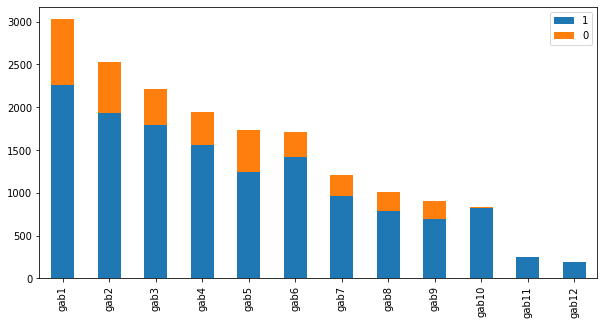

In [90]:
bar_chart('horaire_ouverture_mag')

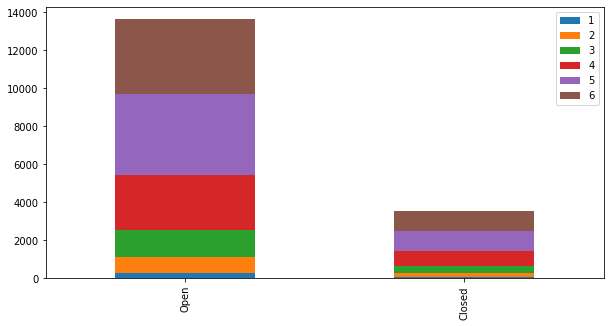

In [97]:
bar_chart('retrait-categorie')

#### 2- les petits retaits se font uniquement sur qlq GAB avec une frequence tres faible

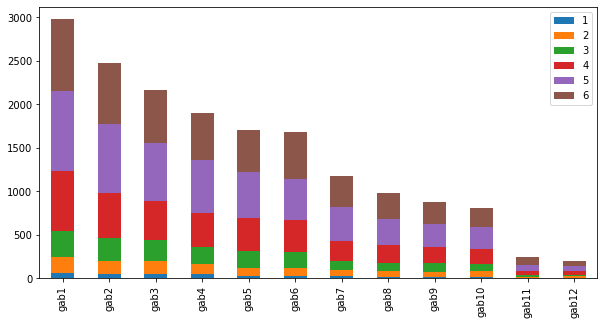

In [94]:
bar_chart1('retrait-categorie')

#### le fonctionnement par region 

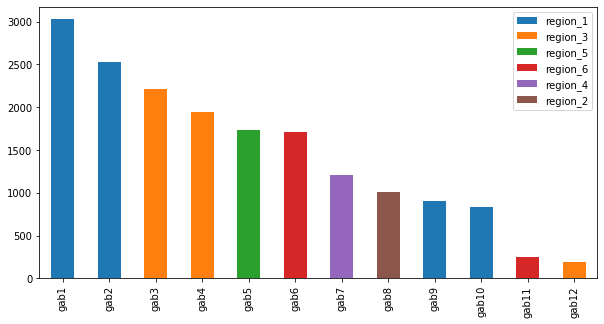

In [100]:
bar_chart1('region')

### Les fonctions bar_chart () utilisé

In [96]:
def bar_chart(feature):
    opene = df[df['horaire_ouverture_mag']==1][feature].value_counts()
    close = df[df['horaire_ouverture_mag']==0][feature].value_counts()
    df1 = pd.DataFrame([opene,close])
    df1.index = ["Open","Closed"]
    df1.plot(kind='bar',stacked=True,figsize=(10,5))
    

In [88]:
def bar_chart1(feature):
    gab1 = df[df['id_gab']==2][feature].value_counts()
    gab2 = df[df['id_gab']==11][feature].value_counts()
    gab3 = df[df['id_gab']==22][feature].value_counts()
    gab4 = df[df['id_gab']==4][feature].value_counts()
    gab5 = df[df['id_gab']==6][feature].value_counts()
    gab6 = df[df['id_gab']==7][feature].value_counts()
    gab7 = df[df['id_gab']==5][feature].value_counts()
    gab8 = df[df['id_gab']==3][feature].value_counts()
    gab9 = df[df['id_gab']==75][feature].value_counts()
    gab10 = df[df['id_gab']==103][feature].value_counts()
    gab11 = df[df['id_gab']==97][feature].value_counts()
    gab12 = df[df['id_gab']==106][feature].value_counts() 
    df1 = pd.DataFrame([gab1,gab2,gab3,gab4,gab5,gab6,gab7,gab8,gab9,gab10,gab11,gab12])
    df1.index = ['gab1','gab2','gab3','gab4','gab5','gab6','gab7','gab8','gab9','gab10','gab11','gab12']
    df1.plot(kind='bar',stacked=True,figsize=(10,5))
    